<a href="https://colab.research.google.com/github/sglhsr/Machine_Learing/blob/main/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


new  [384.33 117.33 321.5 ] [ 51.   244.11 346.25]
Old  [372 142 307] [ 44 224 255]
[ 12.33 -24.67  14.5 ]
new  [384.33 304.67 110.75] [ 51.   356.89 219.38]
Old  [384.33 117.33 321.5 ] [ 51.   244.11 346.25]
[   0.    187.34 -210.75]
Done


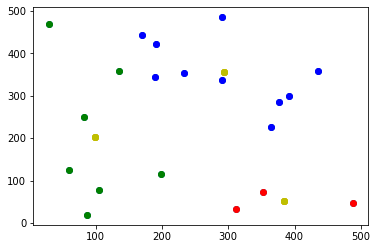

In [ ]:

cl_num=3  #中心點
data_num=20  #共幾個資料點
thr=[0.00001,0.00001,0.00001]
def dist(x,y,mu_x,mu_y):
    return (mu_x-x)**2 + (mu_y-y)**2
#分cluster
def cluster(x,y,mu_x,mu_y):
    cls_=dict()  #轉成dictionary
    for i in range(data_num):
        dists=[] #全部點的距離
        for j in range(cl_num):
            distanct=dist(x[i],y[i],mu_x[j],mu_y[j])
            dists.append(distanct)
#             print("distanct ", distanct)
#             print("dists ",dists)
#         print("Min ",min(dists))
#         print("min dists index",dists.index(min(dists)))
        #該資料點離全部中心點最短的距離的index
        cl=dists.index(min(dists))
        #抓每個資料點跟哪個中心點最近 並附加到最短中心點連結的字典
        if cl not in cls_:
            cls_[cl]=[(x[i],y[i])]
        elif cl in cls_:
            cls_[cl].append((x[i],y[i]))
#         print(i,"cls:" , cls_[cl])
#     print(cls_)
    return cls_
#用各中心點最短的資料點平均 算出新的中心點座標
def re_mu(cls_,mu_x,mu_y):
    new_muX=[]
    new_muY=[]
    
    for key,values in cls_.items():
        if len(values)==0:
            values.append([mu_x[key],mu_y[key]])
        
        sum_x=0
        sum_y=0
        for v in values:
            sum_x+=v[0]
            sum_y+=v[1]
        
        new_mu_x=sum_x/len(values)
        new_mu_y=sum_y/len(values)
        
        new_muX.append(round(new_mu_x,2))
        new_muY.append(round(new_mu_y,2))
    return new_muX,new_muY
    
def main():
    #隨機資料點
    x=np.random.randint(0,500,data_num)
    y=np.random.randint(0,500,data_num)
    #隨機中心點
    mu_x=np.random.randint(0,500,cl_num)
    mu_y=np.random.randint(0,500,cl_num)
    
   
    cls_=cluster(x,y,mu_x,mu_y)
    
    new_muX,new_muY=re_mu(cls_,mu_x,mu_y)

#     print(np.array(new_muX))
#     print(np.array(mu_x))
#     print(np.array(new_muX)-np.array(mu_x))
#     print(thr)
#     print(abs(np.array(new_muX)-np.array(mu_x))>thr)
    
    #一直抓平均值直到新中心點誤差<thr
    while any(abs(np.array(new_muX)-np.array(mu_x)>thr)) != False or any(abs(np.array(new_muY)-np.array(mu_y)>thr)) !=False:
     
            print("new ",np.array(new_muX),np.array(new_muY))
            print("Old ",np.array(mu_x),np.array(mu_y))
            print(np.array(new_muX)-np.array(mu_x))
            mu_x=new_muX
            mu_y=new_muY
          
            cls_=cluster(x,y,mu_x,mu_y)
#             print("cls: ",cls_)
            new_muX,new_muY=re_mu(cls_,mu_x,mu_y)
#             print("mu_X:",new_muX)
#             print("mu_Y:",new_muY)
#             print(np.array(new_muX),np.array(mu_x))
#             print(np.array(new_muX)-np.array(mu_x))
    print('Done')
    plt.scatter(x,y)
    plt.scatter(new_muX,new_muY)
#     plt.show()
    
    colors=['r','b','g']
    for key,values in cls_.items():
        cx=[]
        cy=[]
        for v in values :
            cx.append(v[0])
            cy.append(v[1])
        plt.scatter(cx,cy,color=colors[key])
        plt.scatter(new_muX,new_muY,color='y')
#     plt.scatter(new_muX,new_muY,color='y')
if __name__=='__main__':
    main()


    

In [ ]:
aa=dict()
aa={"a":"2","b":"3","c":"5"}
for key,values in aa.items():
    print(key,values)

a 2
b 3
c 5
